In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F

from devinterp.optim import SGLD
from devinterp.slt.sampler import estimate_learning_coeff_with_summary
from devinterp.utils import plot_trace, default_nbeta

from rasp_models.palindrome import check_palindrome
from tracr.haiku_to_pytorch import haiku_to_pytorch, apply
from trainedmodels import *

from datasets.dataloaders import makePalindromeDataLoader
import matplotlib.pyplot as plt

In [6]:
assembled_model = check_palindrome()

In [32]:
loader = makePalindromeDataLoader(10)
test_loader = makePalindromeDataLoader(10)

In [3]:
def evaluate(model, data):
    inputs, outputs = data[0]

    model_output = model.forward(inputs)

    loss = F.cross_entropy(model_output, outputs)
    return loss, {
        "logits": model_output
    }

In [33]:
model, results = train_model(loader, assembled_model, 50, evaluate, test_loader, training_params=dict(lr=1e-3, weight_decay=1e-5, betas=(0.9,0.999), eps=1e-9), llc_dict=dict(lr=1e-7, loc=3, num_chains=3, num_draws=10))

Initial training loss = 1.0102


/home/wisp/anaconda3/envs/llc/lib/python3.10/site-packages/devinterp/utils.py:88: UserWarning: default nbeta is undefined for batch_size * grad_accum_steps == 1, falling back to default value of 1
  warnings.warn(
/home/wisp/anaconda3/envs/llc/lib/python3.10/site-packages/devinterp/slt/sampler.py:117: UserWarning: Using passed in nbeta. Make sure callbacks are also initialized with the same nbeta.
  warnings.warn(
/home/wisp/anaconda3/envs/llc/lib/python3.10/site-packages/devinterp/backends/default/slt/sampler.py:240: UserWarning: You are taking more draws than burn-in steps, your LLC estimates will likely be underestimates. Please check LLC chain convergence.
  warnings.warn(
/home/wisp/anaconda3/envs/llc/lib/python3.10/site-packages/devinterp/backends/default/slt/sampler.py:285: UserWarning: If you're setting a nbeta or temperature in optimizer_kwargs, please also make sure to set it in the callbacks.
  warnings.warn(
/home/wisp/anaconda3/envs/llc/lib/python3.10/site-packages/devinte

Initial test loss = 0.6701


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 16.99it/s]


0.45
Epoch 1: training loss = 0.9836
Epoch 1: test loss = 0.6292


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 16.12it/s]


0.23
Epoch 2: training loss = 0.8806
Epoch 2: test loss = 0.5666


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 16.44it/s]


0.31
Epoch 3: training loss = 0.7642
Epoch 3: test loss = 0.5563


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 16.15it/s]


-0.05
Epoch 4: training loss = 0.7139
Epoch 4: test loss = 0.5642


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 13.98it/s]


0.03
Epoch 5: training loss = 0.6861
Epoch 5: test loss = 0.5851


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 15.29it/s]


0.19
Epoch 6: training loss = 0.6734
Epoch 6: test loss = 0.5668


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 15.42it/s]


0.11
Epoch 7: training loss = 0.6680
Epoch 7: test loss = 0.5662


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 14.66it/s]


0.37
Epoch 8: training loss = 0.6580
Epoch 8: test loss = 0.5690


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 14.94it/s]


-0.11
Epoch 9: training loss = 0.6508
Epoch 9: test loss = 0.5757


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 15.95it/s]


-0.03
Epoch 10: training loss = 0.6377
Epoch 10: test loss = 0.6034


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 17.20it/s]


-0.24
Epoch 11: training loss = 0.6347
Epoch 11: test loss = 0.6023


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 14.54it/s]


-0.19
Epoch 12: training loss = 0.6277
Epoch 12: test loss = 0.5877


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 15.51it/s]


0.01
Epoch 13: training loss = 0.6189
Epoch 13: test loss = 0.5823


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 16.38it/s]


-0.14
Epoch 14: training loss = 0.6119
Epoch 14: test loss = 0.5901


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 15.62it/s]


0.01
Epoch 15: training loss = 0.6077
Epoch 15: test loss = 0.5834


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 18.11it/s]


-0.3
Epoch 16: training loss = 0.5996
Epoch 16: test loss = 0.6003


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 13.27it/s]


0.08
Epoch 17: training loss = 0.5980
Epoch 17: test loss = 0.6013


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 17.89it/s]


0.22
Epoch 18: training loss = 0.5980
Epoch 18: test loss = 0.6074


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 17.57it/s]


0.18
Epoch 19: training loss = 0.5934
Epoch 19: test loss = 0.5999


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 15.03it/s]


-0.05
Epoch 20: training loss = 0.5856
Epoch 20: test loss = 0.6076


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 15.23it/s]


0.12
Epoch 21: training loss = 0.5873
Epoch 21: test loss = 0.6221


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 15.08it/s]


-0.08
Epoch 22: training loss = 0.5804
Epoch 22: test loss = 0.6163


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 14.45it/s]


0.24
Epoch 23: training loss = 0.5815
Epoch 23: test loss = 0.6081


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 15.99it/s]


-0.13
Epoch 24: training loss = 0.5739
Epoch 24: test loss = 0.6309


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 14.66it/s]


0.16
Epoch 25: training loss = 0.5716
Epoch 25: test loss = 0.6276


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 17.47it/s]


-0.23
Epoch 26: training loss = 0.5719
Epoch 26: test loss = 0.6235


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 16.68it/s]


-0.14
Epoch 27: training loss = 0.5714
Epoch 27: test loss = 0.6426


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 14.73it/s]


-0.07
Epoch 28: training loss = 0.5696
Epoch 28: test loss = 0.6281


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 15.77it/s]


-0.26
Epoch 29: training loss = 0.5693
Epoch 29: test loss = 0.6251


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 16.51it/s]


-0.05
Epoch 30: training loss = 0.5634
Epoch 30: test loss = 0.6357


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 16.31it/s]


-0.27
Epoch 31: training loss = 0.5610
Epoch 31: test loss = 0.6331


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 15.02it/s]


-0.04
Epoch 32: training loss = 0.5638
Epoch 32: test loss = 0.6489


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 15.46it/s]


-0.26
Epoch 33: training loss = 0.5614
Epoch 33: test loss = 0.6389


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 15.82it/s]


0.01
Epoch 34: training loss = 0.5569
Epoch 34: test loss = 0.6579


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 15.45it/s]


0.13
Epoch 35: training loss = 0.5606
Epoch 35: test loss = 0.6388


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 16.12it/s]


0.05
Epoch 36: training loss = 0.5633
Epoch 36: test loss = 0.6689


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 15.88it/s]


0.03
Epoch 37: training loss = 0.5572
Epoch 37: test loss = 0.6302


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 15.56it/s]


0.04
Epoch 38: training loss = 0.5622
Epoch 38: test loss = 0.6477


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 17.36it/s]


-0.11
Epoch 39: training loss = 0.5573
Epoch 39: test loss = 0.6494


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 13.02it/s]


-0.09
Epoch 40: training loss = 0.5569
Epoch 40: test loss = 0.6431


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 16.87it/s]


0.35
Epoch 41: training loss = 0.5565
Epoch 41: test loss = 0.6554


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 16.36it/s]


0.23
Epoch 42: training loss = 0.5558
Epoch 42: test loss = 0.6425


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 16.02it/s]


-0.18
Epoch 43: training loss = 0.5504
Epoch 43: test loss = 0.6718


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 16.27it/s]


-0.08
Epoch 44: training loss = 0.5465
Epoch 44: test loss = 0.6487


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 17.84it/s]


0.03
Epoch 45: training loss = 0.5491
Epoch 45: test loss = 0.6549


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 17.22it/s]


-0.06
Epoch 46: training loss = 0.5503
Epoch 46: test loss = 0.6474


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 16.13it/s]


0.15
Epoch 47: training loss = 0.5501
Epoch 47: test loss = 0.6569


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 13.07it/s]


0.08
Epoch 48: training loss = 0.5498
Epoch 48: test loss = 0.6582


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 10.77it/s]


0.01
Epoch 49: training loss = 0.5461
Epoch 49: test loss = 0.6626


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 17.28it/s]


-0.03
Epoch 50: training loss = 0.5476
Epoch 50: test loss = 0.6461


Chain 2: 100%|██████████| 10/10 [00:00<00:00, 14.97it/s]

-0.05


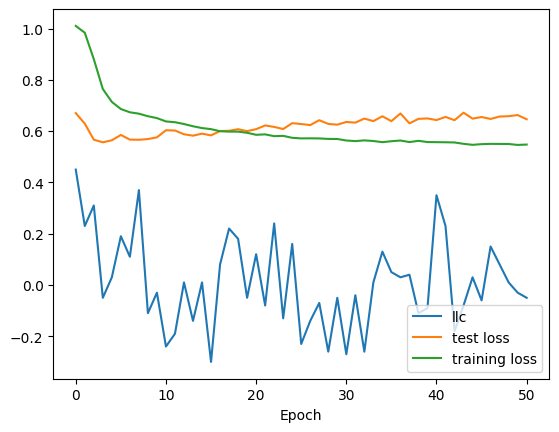

In [35]:
x = range(0, len(results['llc']))
plt.plot(x, results['llc'], label='llc')
plt.plot(x, results['test_loss'], label='test loss')
plt.plot(x, results['train_loss'], label='training loss')
plt.xlabel("Epoch")
plt.legend(loc='lower right')
plt.show()